In [1]:
from PIL import Image
import os
import csv

# Definir la posición y tamaño de la región a recortar donde estan las respuestas
xPosition = 1620
yPositions = [950,1198,1478,1726,2005,2253,2532,2777,3026,3274]
answersBoxWidth = 2794 - 1620
answersBoxHeight = 100

singleBoxWidth = 1854 -1620
singleBoxHeight = 100

#Recorrer las imagenes del directorio
folder_path = 'Resources/SUS'
files_in_folder = os.listdir(folder_path)
# Filtrar los archivos que son imágenes PNG
imagenes_png = [archivo for archivo in files_in_folder if archivo.lower().endswith('.png')]

final_answers = []

# Iterar sobre las imágenes de los tests
for nombre_archivo in imagenes_png:
    image_path = os.path.join(folder_path, nombre_archivo)
    image = Image.open(image_path)
    #convertir a escala grises
    image = image.convert('L')   

    #Obtener las cajas con las respuestas
    answerBoxes = [image.crop((xPosition, yPosition, xPosition + answersBoxWidth, yPosition + answersBoxHeight)) for yPosition in yPositions]
    
    #Recortar las cajas de las respuestas en cajas individuales
    answersSingleBoxes = []
    for i in range(len(answerBoxes)):
        temp_list = []
        for j in range(5):
            temp_x_position = j * singleBoxWidth
            imagen_recortada = answerBoxes[i].crop((temp_x_position, 0, temp_x_position + singleBoxWidth, singleBoxHeight))
            temp_list.append(imagen_recortada)
        
        answersSingleBoxes.append(temp_list)

    #Calcular el sumatorio de pixeles de cada caja
    answersPixelSum = []
    for i in range(len(answersSingleBoxes)):
        temp_list = []
        for j in range(len(answersSingleBoxes[i])):
            temp_list.append(sum(answersSingleBoxes[i][j].getdata()))
        answersPixelSum.append(temp_list)

    #Obtener la respuesta usando el minimo de la suma de pixeles como la respuesta seleccionada
    correctAnswers = [answer.index(min(answer)) + 1 for answer in answersPixelSum]   
    final_answers.append(correctAnswers)





In [2]:
#Guardar los datos en un CSV
csv_file_path = 'Results/SUSResults.csv'

# Write the data to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(final_answers)

In [3]:
#Calculo de estadisticas
question_answers = list(zip(*final_answers))

avg_question = [sum(x)/len(x) for x in question_answers]
global_avg = sum(avg_question)/len(avg_question)

print("Puntuación media por pregunta: ", avg_question)
print("Puntuación media global: ", global_avg)





Puntuación media por pregunta:  [3.625, 2.5, 3.2916666666666665, 3.4166666666666665, 3.9166666666666665, 2.75, 4.041666666666667, 2.4583333333333335, 3.3333333333333335, 3.0416666666666665]
Puntuación media global:  3.2375


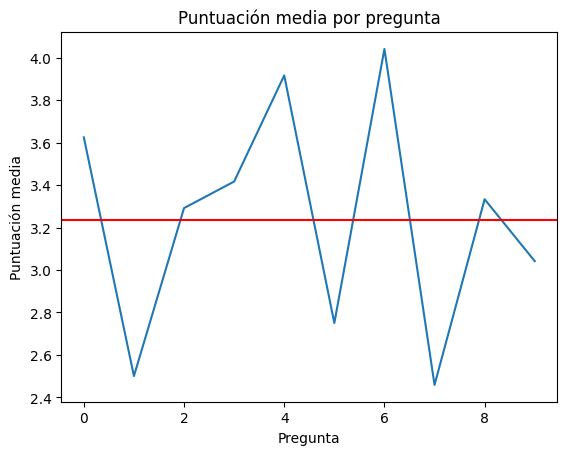

In [4]:
#Show the data using matplotlib
import matplotlib.pyplot as plt

plt.plot(avg_question)
plt.axhline(y=global_avg, color='r', linestyle='-')
plt.xlabel('Pregunta')
plt.ylabel('Puntuación media')
plt.title('Puntuación media por pregunta')
plt.show()
